# Worksheet 02

Name: **Bowen Li**  
UID: **U79057147** 

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?

A drawback of the top down approach is that it will be difficult to test the code until some of the elementary functions have been written, which could be a while into the workflow.

b) What is a drawback of the bottom up approach?

A drawback of the bottom up approach is that it can be difficult to know what the project may or may not need in the future, which could lead to wasted work.

c) What are 3 things you can do to have a better debugging experience?

- Compartmentalize the responsibilities of the code so it's better defined which part is supposed to do what.
- Favor many functions with small bodies over a few functions with large and complex bodies.
- Keep the code simple and easy to read.

d) (Optional) Follow along with the live coding. You can write your code here:

In [11]:
class Board:

    def __init__(self, n=8):
        self.n = n
        self.board = [["-"]*n for _ in range(n)]

    def __repr__(self):
        res = ""
        for row in range(self.n):
            for col in range(self.n):
                res += self.board[row][col]
                res += " "
            res += "\n"

        return res

    def set_queen_at(self, row, col):
        self.board[row][col] = "Q"

    def unset_queen_on_row(self, row):
        self.board[row] = ["-"] * self.n

    def find_solution(self):

        row = 0
        col = 0

        while row < 8:
            # we are searching for a solution

            if self.is_valid_move(row, col): # TODO
                self.set_queen_at(row, col)
                row += 1
                col = 0
            else:
                col += 1
                if col >= self.n:
                    # we weren't able to place a queen on this row
                    # so we need to backtrack and adjust the position
                    # of the queen on the previous row
                    
                    col = self.get_queen_on_row(row - 1) # TODO
                    col += 1
                    row -= 1

        # we have found a solution
        print("Found a solution: ")
        print(self)

test = Board()
test.set_queen_at(1,1)
print(test)
test.unset_queen_on(1)
print(test)

- - - - - - - - 
- Q - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 

- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 
- - - - - - - - 



## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [2]:
import pandas as pd

df = pd.read_csv('train.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Complete the code so it returns the number of rows that have at least one empty column value

In [3]:
print("there are " +  str(df.shape[0] - df.dropna().shape[0]) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Complete the code below to remove all columns with more than 200 NaN values

In [4]:
df = df.dropna(axis=1, thresh=df.shape[0] - 200)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Complete the code below to replaces `male` with 0 and `female` with 1

In [5]:
df['Sex'] = df['Sex'].replace({'male':0, 'female':1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [6]:
df[['First Name', 'Middle Name', 'Last Name', 'Title']] = df['Name'].str.split('(?:, |\. |\s)', n=4, expand=True)[[2, 3, 0, 1]]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,None,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


f) Complete the code below to replace all missing ages with the average age

In [7]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,None,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

<Axes: xlabel='Survived'>

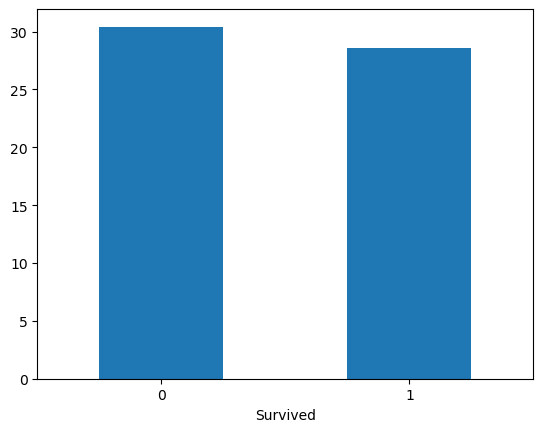

In [8]:
df.groupby(['Survived'])['Age'].mean().plot.bar(x='Survived', y='Average Age', rot=0)

**The average age of those who survived was slightly lower than the average age of those who did not.**